(haxby-dataset)=
# An overview of the Haxby dataset

This part of the `tutorial` aims to make `participants` familiar with the `dataset` we are going to use during this session and also address/introduce/recap some important aspects concerning `datasets` within `machine learning`/`decoding`. The objectives 📍 are:

- (re-)familiarize everyone with important `datasets` aspects

- exploring and understand the `tutorial dataset`


## A short primer on datasets

We wanted to avoid "just talking" about `brain decoding` in theory and also showcase how the respective `models` and workflows can be implemented, as well as run to give you some first hands-on experience. Even though we would have loved to get everyone to bring their data and directly apply the things we talk about, it's unfortunately a bit too time-consuming for this setting. Thus, we decided to utilize an `example dataset` that is ready to go and "small enough" to run `decoding models` locally, ie on laptops. You might think "One of those tutorials again...it works with the example dataset but I have little or no chance on running it on/adapting it to my data." and we would agree based on workshops we did ourselves. 

However, we tried our best to address this here by utilizing `software` whose `workflows` and `processing steps` are rather agnostic and implemented via `high-level API` that _should_ allow a comparably straightforward application to different kinds of `data`. This specifically refers to a set of core aspects concerning the dataset's structure and information entailed therein. How about a brief recap?

```{figure} graphics/decoding_pipeline_example.png
---
width: 800px
name: decoding_pipeline_example
---

A schematic representation of standard `decoding workflow`/`pipeline`. The `input` (`data`) is prepared and potentially `preprocessed` before being submitted to a `model` that then utilizes a certain `metric` to provide a certain `output`.
``` 

Here, we are going to focus on the `input` (`data`). As you heard before, it is usually expected to be structured as `samples` X `features`. 

```{admonition} What could samples X features refer to/entail?
:class: tip, dropdown

A `sample` could be considered an `observation`/`data point`/one distinct entity in the `dataset`/one distinct part of the `dataset`. For example, if you want to `predict` what a participant perceived based on their `brain activation`/`response`, the `samples` could entail the `fMRI` `scans` or estimated `contrast images` of that `participant`. If you want to `predict` whether a `participant` exhibited a certain `behavior`, e.g. a captured by a `clinical measure`, etc., then the `samples` could comprise different `participants`.  

A `feature` on the other hand would entail/describe certain aspects of a given `sample`. For example, if you want to `predict` what a participant perceived based on their `brain activation`/`response`, the `features` could entail the `voxel pattern` at a certain `ROI` at the given `sample`. 
```

Thus, in order to make a given `dataset` "ready" for `machine learning`/`decoding`, we need to get it into the respective structure. Lucky for us, the tools we are going to explore, specifically `nilearn`, incorporate this aspect and are make the corresponding process rather easy. What you need to run `machine learning`/`decoding` on your `dataset` is:

- know what your `samples` are (e.g. `time series`, `statistical maps`, etc.)
- know what your `features` are (e.g. `voxel pattern` of an `ROI`, `annotations`, etc.)
- get the `dataset` in the form `samples` X `features`, ie `samples` are `rows` and `features` are `columns`

While exploring the `tutorial dataset` we will refer to this to make it more clear.

```{admonition} Bonus question: ever heard of the "small-n-high-p" (p >> n) problem?
:class: tip, dropdown

"Classical" `machine learning`/`decoding` models and the underlying algorithms operate on the assumption that are more `samples` than there are `predictors` or `features` . In fact many more. Why is that?
Consider a high-dimensional `space` whose `dimensions` are defined by the number of `features` (e.g. `10 features` would result in a space with `10 dimensions`. The resulting `volume` of this `space` is the amount of `samples` that could be drawn from the `domain` and the number of `samples` entail the `samples` you need to address your `learning problem`, ie `decoding` outcome. That is why folks say: "get more data", `machine learning` is `data`-hungry: our `sample` needs to be as representative of the high-dimensional domain as possible. Thus, as the number of `features` increases, so should the number of `samples` so to capture enough of the `space` for the `decoding model` at hand.

This referred to as the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) and poses as a major problem in many fields that aim to utilize `machine learning`/`decoding` on unsuitable data. Why is that?
Just imagine we have way more `features` than `samples`, ie `50 features` and `10` `samples`. Instead of having a large amount of `samples` within the `space`, allowing to achieve a sufficient coverage of the latter, we now have a very high-dimensional `space` (`50 dimensions`) and only very few `samples` therein, basically not allowing us to capture nearly enough of the `space` as we would need to. This can result in expected outcomes, misleading results or even lead to complete `model` failure. Furthermore, respective `datasets` often lead to `models` that are `overfitted` and don't `generalize` well. 

However, there are a few things that can be done to address this, including `feature selection`, `projection` into `lower-dimensional` `spaces` or `representations` or `regularization`. 

Question for everyone: what kind have `datasets` do we usually have in `neuroscience`, especially `neuroimaging`?
```

## Downloading & exploring the `Haxby dataset`

In the field of `functional magnetic resonance imaging` (`fMRI`), one of the first studies which have demonstrated the feasibility of `brain decoding` was the study by Haxby and colleagues (2001) {cite:p}`Haxby2001-vt`. `Subjects` were presented with various `images` drawn from different `categories` and subsequently a `decoding model` used to `predict` the presented `categories` based on the `brain activity`/`responses`. In the respective parts of this session, we will try to do the same! 

We are going to start with one `subject`, number `4`. To get the `data`, we can simply use [nilearn's dataset module](https://nilearn.github.io/stable/modules/datasets.html). At first, we need to import the respective `module`.

In [31]:
import os
from nilearn import datasets

Next, we get the `data` and going to save it in a directory called `data`. Depending on your machine and internet connection, this might take a minute or so.

In [32]:
data_dir = os.path.join('..', 'data')
haxby_dataset = datasets.fetch_haxby(subjects=[4], fetch_stimuli=True, data_dir=data_dir)

What do we have now? Lets have a look!

In [3]:
haxby_dataset

{'anat': ['../data/haxby2001/subj4/anat.nii.gz'],
 'func': ['../data/haxby2001/subj4/bold.nii.gz'],
 'session_target': ['../data/haxby2001/subj4/labels.txt'],
 'mask_vt': ['../data/haxby2001/subj4/mask4_vt.nii.gz'],
 'mask_face': ['../data/haxby2001/subj4/mask8b_face_vt.nii.gz'],
 'mask_house': ['../data/haxby2001/subj4/mask8b_house_vt.nii.gz'],
 'mask_face_little': ['../data/haxby2001/subj4/mask8_face_vt.nii.gz'],
 'mask_house_little': ['../data/haxby2001/subj4/mask8_house_vt.nii.gz'],
 'mask': '../data/haxby2001/mask.nii.gz',
 'description': b'Haxby 2001 results\n\n\nNotes\n-----\nResults from a classical fMRI study that investigated the differences between\nthe neural correlates of face versus object processing in the ventral visual\nstream. Face and object stimuli showed widely distributed and overlapping\nresponse patterns.\n\nContent\n-------\nThe "simple" dataset includes\n    :\'func\': Nifti images with bold data\n    :\'session_target\': Text file containing session data\n   

As you can see, we get a `python dictionary` and there's quite bit in it. This includes:

- the `anatomical data` under `anat`
- the `functional data` under `func`
- an annotation when `participants` perceived what `category`
- several `masks` under `mask*`
- a `dataset` `description`
- `stimuli categories` and respective `stimuli`

`````{admonition} Thinking about input data again...
:class: tip
What would be our `samples` and `features`?
`````

## The data in more depth

After getting a first idea of what our `dataset` entails, we should spend a bit more time exploring it in more depth, starting with the neuroimaging files.

### Neuroimaging files

As seen above, the data includes several `nii` files, which contain `images` of `brain volumes`, either `anatomical` or `functional` `scans`, as well as (`binary`) `masks`. Lets have a look at the `anatomical` `image` first.
Using `nilearn`, we can either `load` and then `plot` it or directly `plot` it. Here we are going to do the first option as it will allow us to check the properties of the `image`.

In [33]:
from nilearn.image import load_img

In [34]:
anat_image = load_img(haxby_dataset.anat)

Now we can access basically all parts of the `image`, including the `header`

In [35]:
print(anat_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 124 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.     1.2    0.9375 0.9375 1.     1.     1.     1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1007.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x        

and actual `data`.

In [36]:
anat_image.dataobj

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [37]:
anat_image.dataobj.shape

(124, 256, 256, 1)

As you can see, this is basically a `numpy array` that has the same `dimensions` as our `image` and the `data` reflect `values` for a given `voxel`. So far so good but how does it actually look? We can make use of one of `nilearn`'s many [plotting functions](https://nilearn.github.io/stable/modules/plotting.html).

In [38]:
from nilearn import plotting

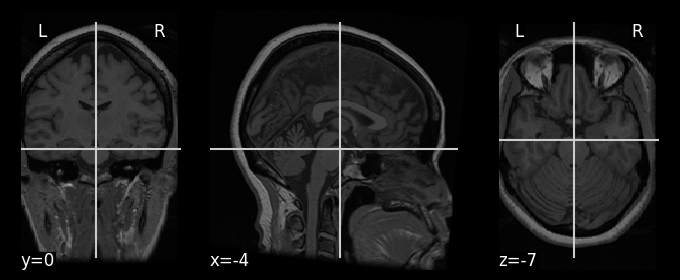

In [40]:
plotting.plot_anat(anat_image)

We can even create an `interactive plot`:

/Users/peerherholz/anaconda3/envs/main_decoding_2022/lib/python3.8/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



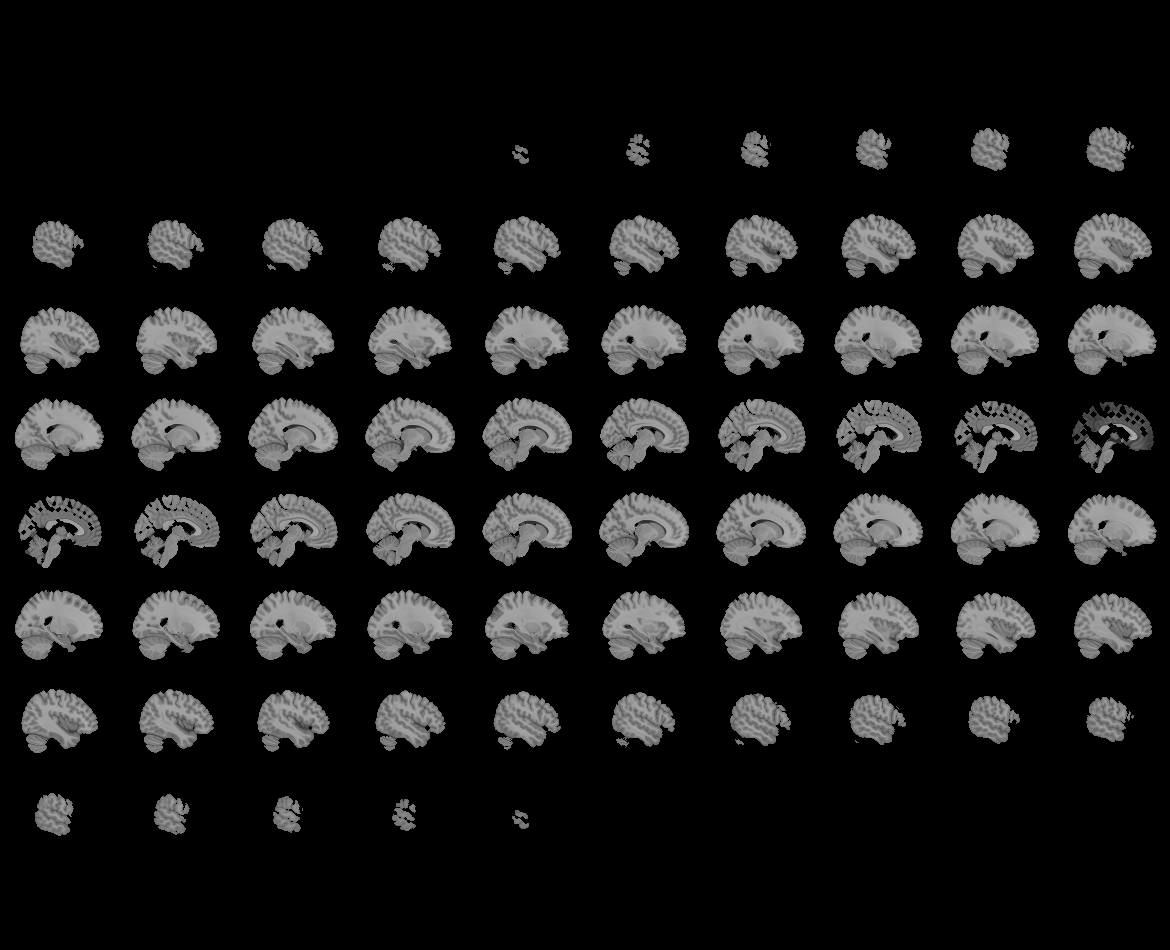
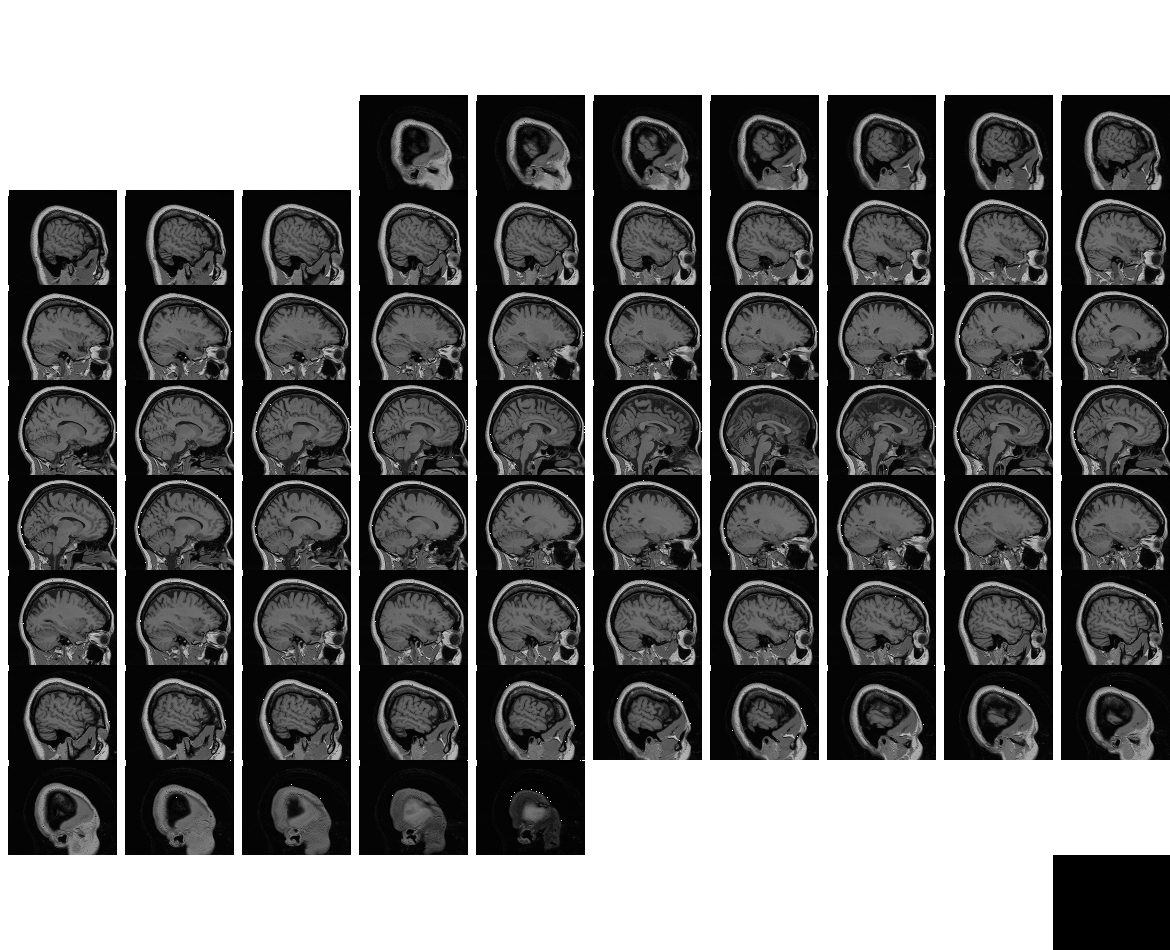

In [41]:
plotting.view_img(anat_image, symmetric_cmap=False, cmap='Greys_r', colorbar=False)

Comparably, we can do the same things with the `functional` `image`. That is `load`ing the `image`:

In [42]:
func_image = load_img(haxby_dataset.func)

and inspect its `header`:

In [43]:
print(func_image.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   40   64   64 1452    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   3.5  3.75 3.75 2.5  0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 3312.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 

and `data`:

In [44]:
func_image.get_fdata()

/var/folders/61/0lj9r7px3k52gv9yfyx6ky300000gn/T/ipykernel_8281/1789311566.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  func_image.get_data()


array([[[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[10, 11, 10, ...,  0,  0,  0],
         [16, 28, 14, ...,  0,  0,  0],
         [17, 23, 28, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 13,  7,  8],
         [ 0,  0,  0, ..., 21, 18, 13],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 4, 11, 11, ...,  0,  0,  0],
         [17, 26, 16, ...,  0,  0,  0],
         [35, 32, 35, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 24, 14, 11],
         [ 0,  0,  0, ..., 22, 24, 23],
         [ 0,  0,  0, ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0, ...,  0,  0,  0],
         [10, 11, 17, ...,  0,  0,  0],
         [21, 14, 29, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ..., 10, 14, 10],
         [ 0,  0,  0, ...,  4,  7,  4],
    

In [45]:
func_image.dataobj.shape

(40, 64, 64, 1452)

`````{admonition} We already noticed something...
:class: tip
The `data` of the `anatomical` and `functional` `image` are quite different. Do you know why and which we would use for our planned `decoding` analyses?
`````

As we have a `4D` `image`, that is `brain volumes` acquired over time (the `4th dimension`), we need to adapt the `plotting` a bit. More precisely, we need to either `plot` a `3D image` at a given `time point` or e.g. compute the `mean image` over `time` and `plot` that. The latter might be more informative and additional shows you how easy this can be done using `nilearn`'s [image functions](https://nilearn.github.io/stable/modules/image.html). Thus, we, at first, `import` the respective `function` and compute the `mean image`:

In [46]:
from nilearn.image import mean_img

In [47]:
func_image_mean = mean_img(func_image)

We can check if this worked via the approach we followed above, ie checking the `data`:

In [48]:
func_image_mean.dataobj.shape

(40, 64, 64)

That seems about right and we can give the plot a try:

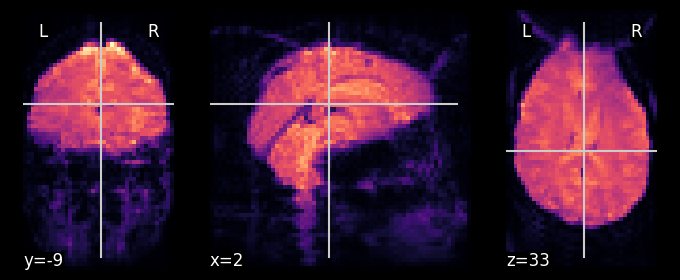

In [49]:
plotting.plot_epi(func_image_mean, cmap='magma')

and of course, this also works for `interactive` plots.


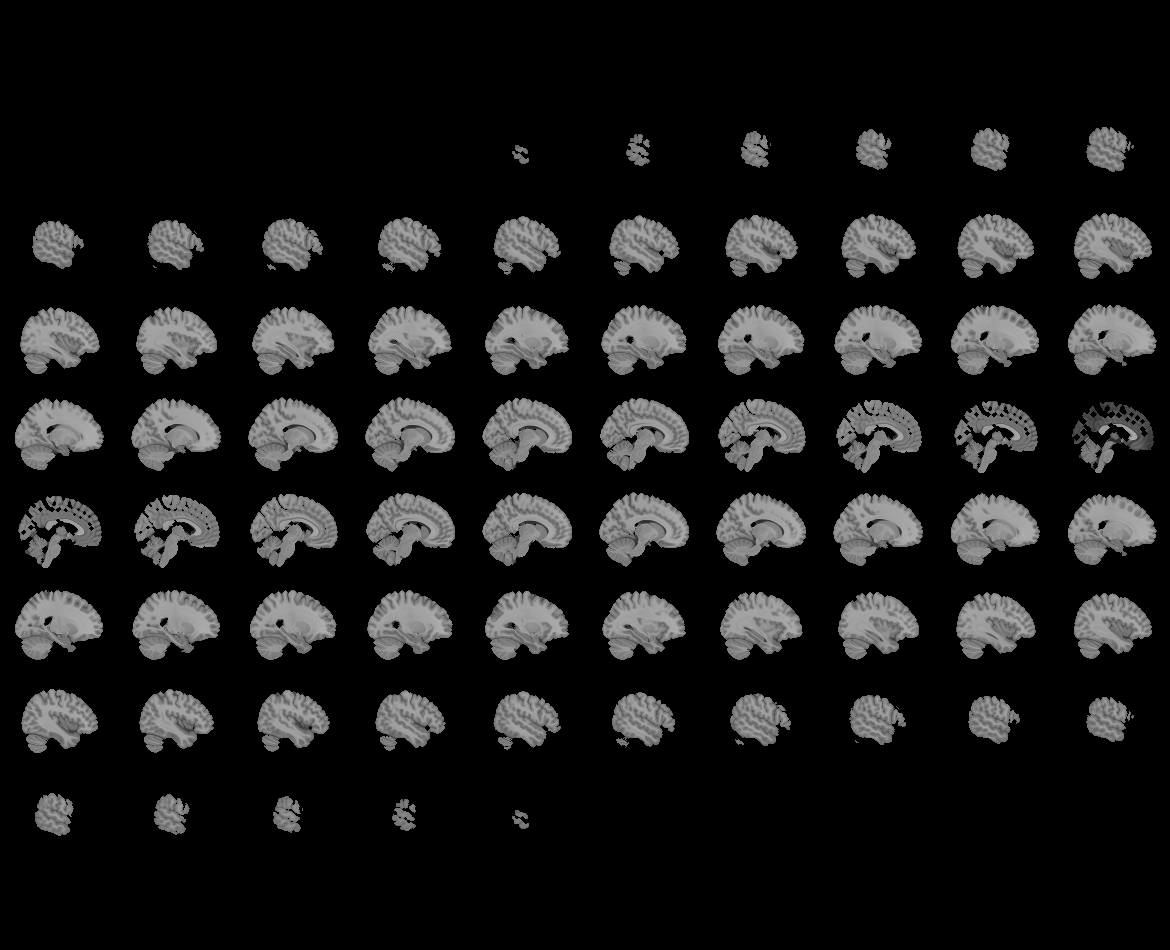
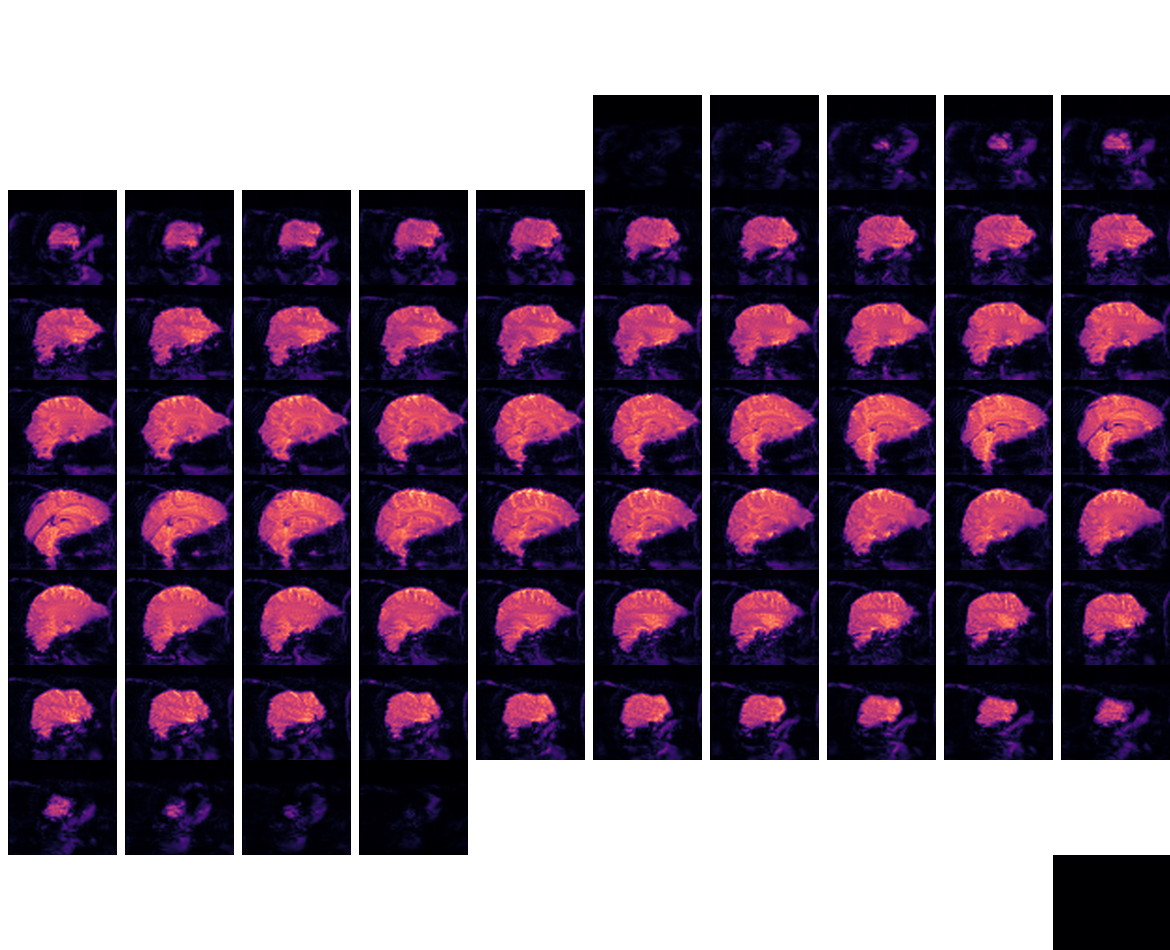

In [50]:
plotting.view_img(func_image_mean, cmap='magma', symmetric_cmap=False)

The last type of `neuroimaging` file we need to check are the (`binary`) `masks`, so let's do it for one example `mask`: the `ventral temporal cortex`. This mask has been generated as part of the Haxby et al. (2001) study {cite:p}`Haxby2001-vt`, and highlights a part of the brain specialized in the processing of visual information, and which contains areas sensitive to different types of image categories {cite:p}`grill-spector_functional_2014` . As with the types before, we can `load`,

In [51]:
vt_mask = load_img(haxby_dataset.mask_vt)

`inspect`

In [52]:
print(vt_mask.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 4 40 64 64  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   3.5  3.75 3.75 1.   1.   1.   1.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL3.3'
aux_file        : b''
qform_code      : unknown
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0
srow_x          : [0. 0. 0. 0.]
srow_y 

In [53]:
vt_mask.get_fdata()

/var/folders/61/0lj9r7px3k52gv9yfyx6ky300000gn/T/ipykernel_8281/2751075843.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  vt_mask.get_data()


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [54]:
vt_mask.dataobj.shape

(40, 64, 64, 1)

and `visualize` it (Here, we are going to plot it as an overlay on the `anatomical image`).

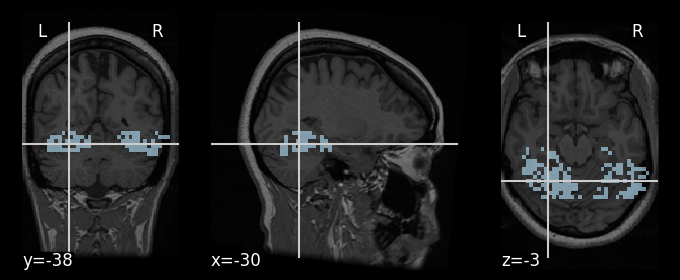

In [55]:
plotting.plot_roi(vt_mask, bg_img=anat_image,
                  cmap='Paired')

With that, we had a quick look at all `neuroimaging` `file` `types` present in the `dataset` and can continue to have a look at the other `file types` (and information therein) required to apply a `decoding model`.

### Labels and stimulus annotations

As mentioned in prior sessions (e.g.[Supervised learning using scikit-learn](https://main-educational.github.io/material.html#supervised-learning-using-scikit-learn) and hinted at the [beginning of this session](#A-short-primer-on-datasets)), when working on a `supervised learning problem`, we also need the `ground truth`/`true labels` for each `sample`. Why? Because we need to evaluate how a given `model` performs via comparing the `labels` it `predicted` to the `true labels`. What these `labels` refer to can be manifold and of course depends on the `task` at hand. 

For example, a `supervised learning problem` in the `dataset` at hand could entail `training` a `model` to `recognize` and `predict` what `category` `participants` perceived based on their `brain activation`. Thus, we would need to know what `category` was shown when during the acquisition of the `data` (or which `category` resulted in which `estimated` `brain activity`). 

Within our `tutorial dataset`, this information is included in the `session_target` file. Using [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) we can easily `load` and `inspect` this file:

In [56]:
import pandas as pd
stimulus_annotations = pd.read_csv(haxby_dataset.session_target[0], delimiter=' ')

In [58]:
stimulus_annotations.head(n=200)

labels  chunks
0     rest       0
1     rest       0
2     rest       0
3     rest       0
4     rest       0
..     ...     ...
195   rest       1
196   rest       1
197   rest       1
198   rest       1
199   shoe       1

[200 rows x 2 columns]

While this is already informative, let's plot it to get a better intuition.

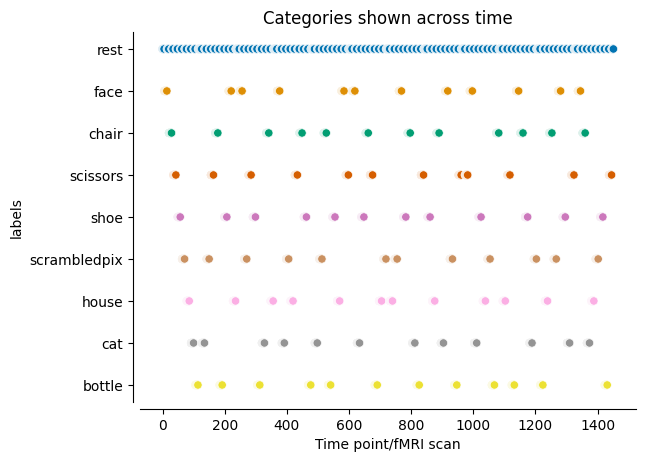

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.scatterplot(x=stimulus_annotations.index, y=stimulus_annotations['labels'], 
                     hue=stimulus_annotations['labels'], legend=False, palette='colorblind')
plt.title('Categories shown across time')
ax.set_xlabel('Time point/fMRI scan')
sns.despine(offset=5)

As we can see, the information provided indicates what `category` `participants` perceived at which `sample` or `fMRI image acquisition` aka point in time during the experiment. With that, we have the needed `labels` for our `samples` (ie our `Y`) and can thus apply a `supervised learning problem`.

## Summary

This already concludes this section of the session within which we explored the went through basic `datasets` concepts again and afterwards explored the `tutorial dataset` which we are going to use during the remaining sections of this session, ie [Decoding via SVM](), [Decoding using MLPs]() and [Decoding using GCNs](). 

Within this section you should have learned:

- important aspects of `datasets`
    - structured input in the form `samples X features`
    - `small n high p` problem  
  
  
- the `tutorial dataset`
    - background
    - file types and information therein
        - `neuroimaging` files
        - `stimulus annotations`

If you have any questions, please don't hesitate to ask us. Thank you very much for your attention and see you in the next section.

## References

```{bibliography}
:filter: docname in docnames
```

## Bonus: checking the stimuli

As you saw above, our `tutorial dataset` actually also contains the `stimuli` utilized in the experiment. This pretty unique (because of e.g. copyright problems) but really cool. As we could use the `stimuli` for certain analyses, e.g. [encoding]() and/or comparing their processing in `biological` and `artificial neural networks`. However, this is unfortunately outside the scope of this session. Thus, we are just going to plot a few of them so you get an impression.

We can examine one functional volume using nilearn's plotting tools. Because fmri data are 4D we use [nilearn.image.mean_img](https://nilearn.github.io/modules/generated/nilearn.image.mean_img.html#nilearn.image.mean_img) to extract the average brain volume.

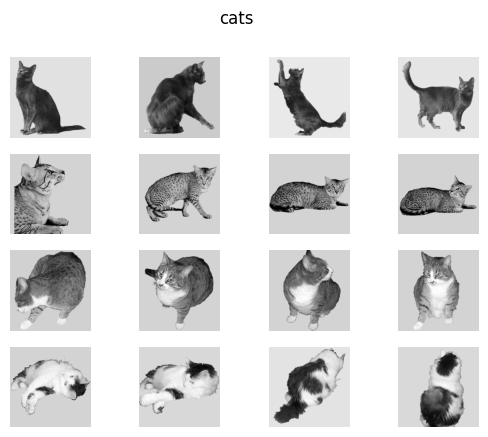

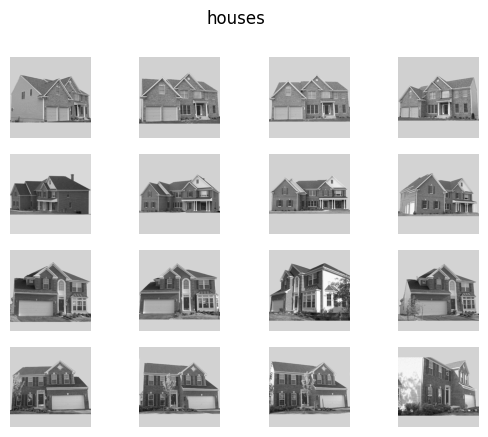

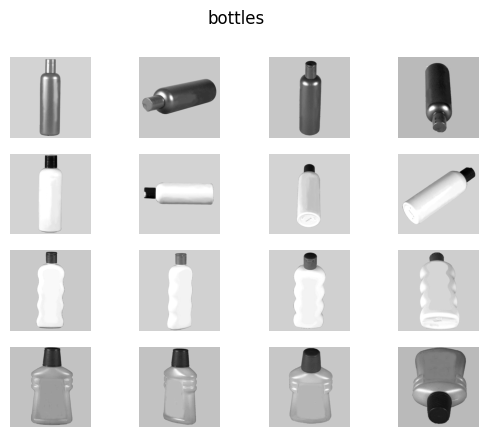

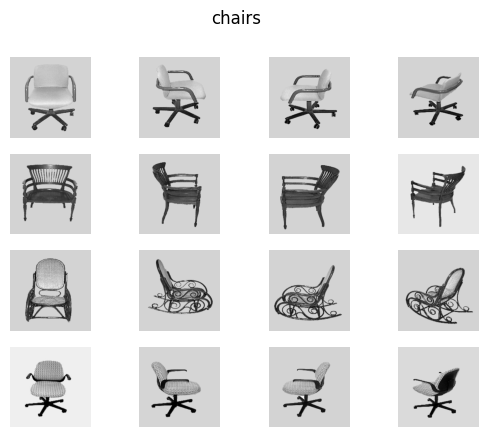

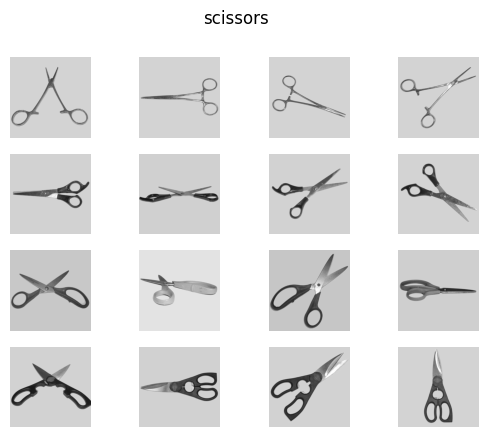

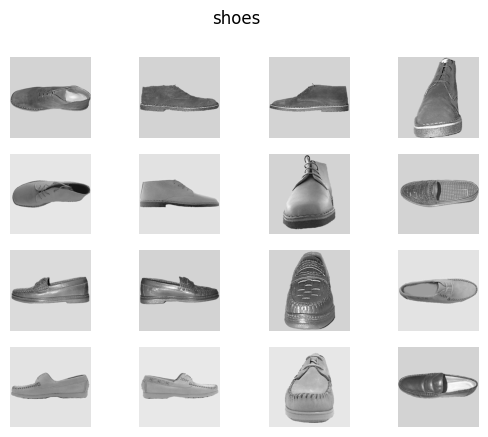

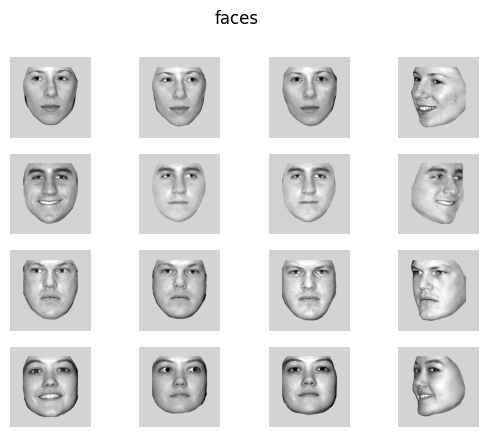

In [29]:
import matplotlib.pyplot as plt

from nilearn import datasets
from nilearn.plotting import show

stimulus_information = haxby_dataset.stimuli

for stim_type in stimulus_information:
  # skip control images, there are too many
  if stim_type != 'controls':

     file_names = stimulus_information[stim_type]
     file_names = file_names[0:16]
     fig, axes = plt.subplots(4, 4)
     fig.suptitle(stim_type)

     for img_path, ax in zip(file_names, axes.ravel()):
         ax.imshow(plt.imread(img_path), cmap=plt.cm.gray)

     for ax in axes.ravel():
         ax.axis("off")

show()

Please note that for each `image` `category`, a number of `scrambled images` were also presented.

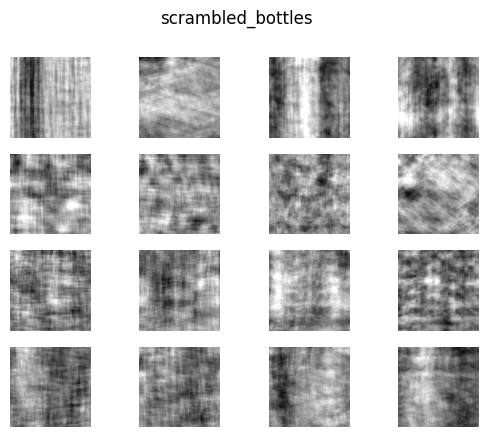

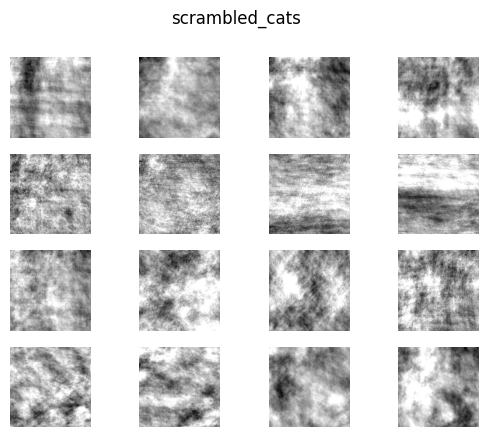

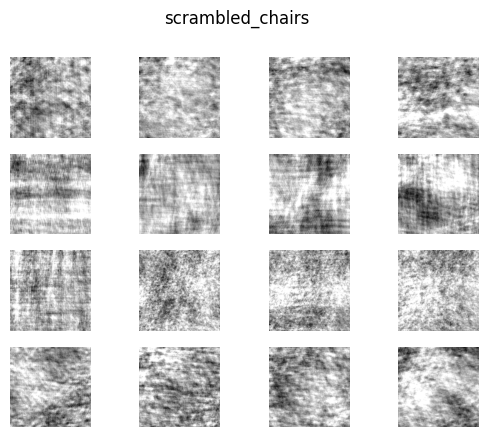

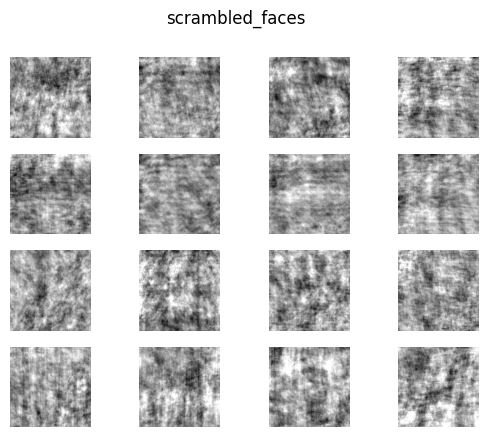

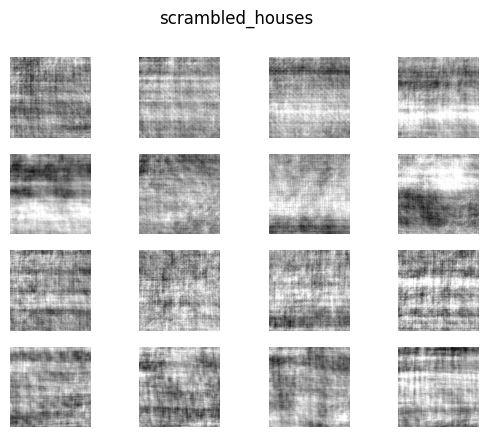

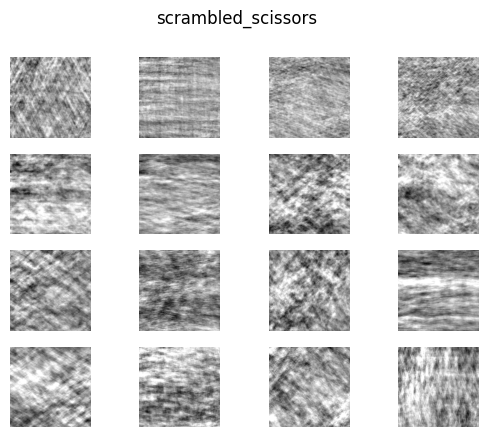

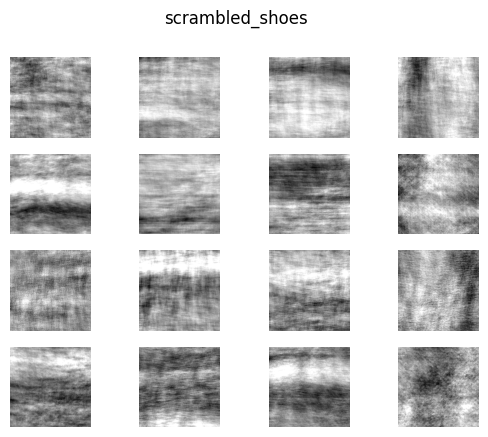

In [30]:
for stim_num in range(len(stimulus_information['controls'])):
    stim_type = stimulus_information['controls'][stim_num][0]
    file_names = stimulus_information['controls'][stim_num][1]  
    file_names = file_names[0:16]
    fig, axes = plt.subplots(4, 4)
    fig.suptitle(stim_type)

    for img_path, ax in zip(file_names, axes.ravel()):
     ax.imshow(plt.imread(img_path), cmap=plt.cm.gray)

    for ax in axes.ravel():
     ax.axis("off")

show()